In [1]:
#!pip install IPython
#import IPython

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import datetime
import seaborn as sn
import pandas as pd
import sklearn
import itertools
import plotly.express as px
import plotly.graph_objects as go

from PIL import Image, ImageChops
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Rescaling, GlobalAveragePooling2D
from keras.utils import to_categorical
from keras import backend as K
from keras.callbacks import Callback
from keras.applications.vgg16 import VGG16
from IPython.display import Audio, display
from keras.utils import plot_model

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import datetime
import librosa
import seaborn as sn
import pandas as pd
import sklearn
import itertools
import plotly.express as px
import plotly.graph_objects as go


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, LSTM
from keras.layers import Rescaling
from keras.utils import to_categorical
from keras import backend as K
from keras.callbacks import Callback
from IPython.display import Audio, display


dataset_path = "/content/drive/MyDrive/Extended_Essay/Data_GZAN/images_original"

music_genres_list = ['blues', 'classical', 'country', 'disco',
                     'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
num_classes = 10

# CNN Big

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 216, 334, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 108, 167, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 165, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 82, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 51, 80, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 40, 128)       0

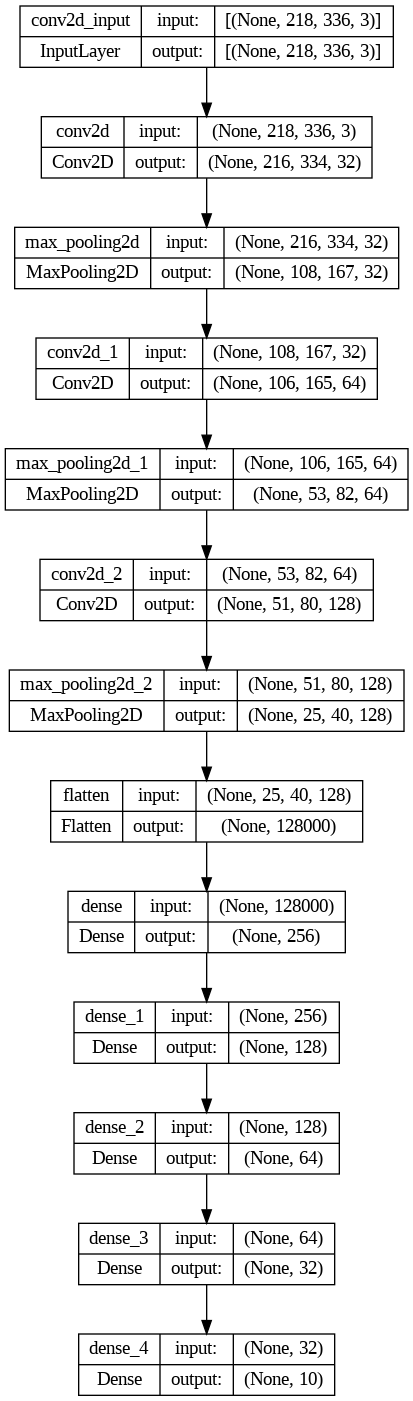

In [ ]:
# define our model: example take from here: https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
input_dims = (218, 336, 3)

spectrogram_model = None

spectrogram_model = Sequential()

# Convolutional layers
spectrogram_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_dims))
spectrogram_model.add(MaxPooling2D(pool_size=(2, 2)))

spectrogram_model.add(Conv2D(64, (3, 3), activation='relu'))
spectrogram_model.add(MaxPooling2D(pool_size=(2, 2)))

spectrogram_model.add(Conv2D(128, (3, 3), activation='relu'))
spectrogram_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten before dense layers
spectrogram_model.add(Flatten())

# Dense layers
spectrogram_model.add(Dense(256, activation='relu'))
spectrogram_model.add(Dense(128, activation='relu'))
spectrogram_model.add(Dense(64, activation='relu'))
spectrogram_model.add(Dense(32, activation='relu'))

# Output layer
num_classes = 10  # Change this to the number of predicted classes
spectrogram_model.add(Dense(num_classes, activation='softmax'))


spectrogram_model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])


spectrogram_model.summary()
plot_model(spectrogram_model, to_file='Mel-spectrogram (Big).png', show_shapes=True, show_layer_names=True)

# CNN Small


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 216, 334, 32)      896       
                                                                 
 activation (Activation)     (None, 216, 334, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 108, 167, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 106, 165, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 106, 165, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 53, 82, 32)        0         
 g2D)                                                 

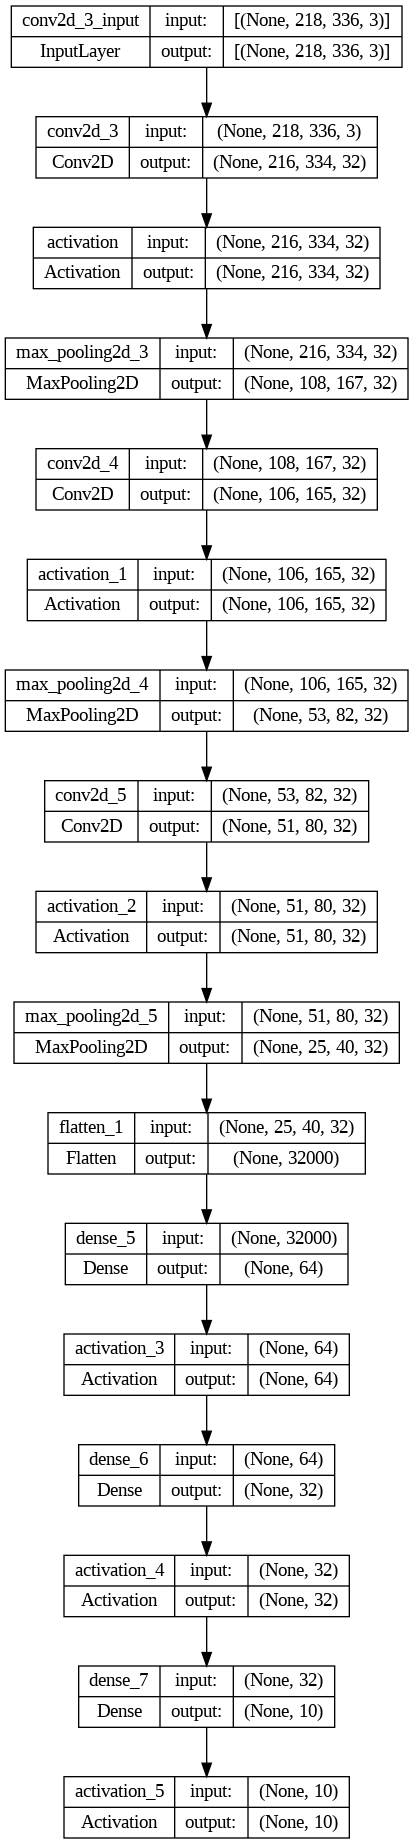

In [ ]:
# define our model: example take from here: https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
input_dims = (218, 336, 3)

spectrogram_model = None

spectrogram_model = Sequential()
spectrogram_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_dims))
spectrogram_model.add(Activation('relu'))
spectrogram_model.add(MaxPooling2D(pool_size=(2, 2)))

spectrogram_model.add(Conv2D(32, (3, 3)))
spectrogram_model.add(Activation('relu'))
spectrogram_model.add(MaxPooling2D(pool_size=(2, 2)))

spectrogram_model.add(Conv2D(32, (3, 3)))
spectrogram_model.add(Activation('relu'))
spectrogram_model.add(MaxPooling2D(pool_size=(2, 2)))

spectrogram_model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
spectrogram_model.add(Dense(64))
spectrogram_model.add(Activation('relu'))
spectrogram_model.add(Dense(32))
spectrogram_model.add(Activation('relu'))
spectrogram_model.add(Dense(10))  # change to num of predicted classes
spectrogram_model.add(Activation('sigmoid'))


spectrogram_model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])


spectrogram_model.summary()
plot_model(spectrogram_model, to_file='Mel-spectrogram (Small).png', show_shapes=True, show_layer_names=True)


# LSTM Big


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 20)            105120    
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dense_8 (Dense)             (None, 10)                210       
                                                                 
Total params: 108610 (424.26 KB)
Trainable params: 108610 (424.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 20)            105120    
                                                          

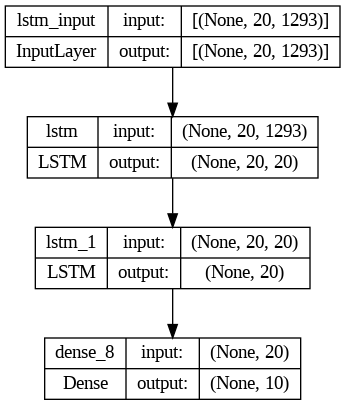

In [ ]:
num_classes = 10
feature_height = 20
sequence_length = 1293
LSTM_units = 20

# define some of the metrics
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

mfcc_model = Sequential()
mfcc_model.add(LSTM(units=LSTM_units, return_sequences=True, input_shape=(feature_height, sequence_length)))  # units define the output space. the LSTM knows that it must process 1293 sequences
mfcc_model.add(LSTM(units=LSTM_units))  # Stack another LSTM layer
mfcc_model.add(Dense(units=num_classes, activation='softmax'))

mfcc_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', precision_m, recall_m])
mfcc_model.summary()
mfcc_model.summary()
plot_model(mfcc_model, to_file='MFCC Model (Big).png', show_shapes=True, show_layer_names=True)

# LSTM Small


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 20)                105120    
                                                                 
 dense_9 (Dense)             (None, 10)                210       
                                                                 
Total params: 105330 (411.45 KB)
Trainable params: 105330 (411.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 20)                105120    
                                                                 
 dense_9 (Dense)             (None, 10)                210       
                                                          

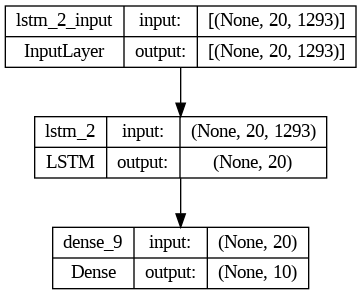

In [ ]:
num_classes = 10
feature_height = 20
sequence_length = 1293
LSTM_units = 20

# define some of the metrics
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


mfcc_model = Sequential()
mfcc_model.add(LSTM(units=LSTM_units, input_shape=(feature_height, sequence_length)))  # units define the output space. the LSTM knows that it must process 1293 sequences
mfcc_model.add(Dense(units=num_classes, activation='softmax'))

mfcc_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', precision_m, recall_m])
mfcc_model.summary()


mfcc_model.summary()
plot_model(mfcc_model, to_file='MFCC Model (Small).png', show_shapes=True, show_layer_names=True)

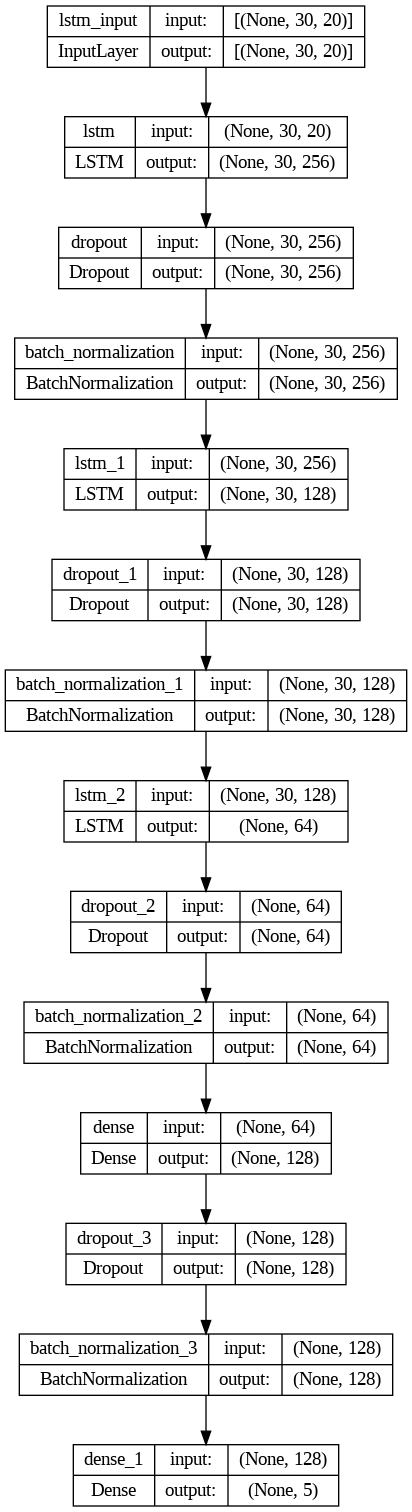

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler


num_classes = 5
num_angles = 20
sequence_length = 30
LSTM_units = 20
LSTM_layers = 10
dropout_rate = 0.3
l2_lambda = 0.001  # Strength of L2 regularization
batch_size = 32
epochs = 100


model = Sequential([
    LSTM(units=256, input_shape=(30, 20), return_sequences=True, kernel_regularizer=l2(0.001), recurrent_regularizer=l2(0.001)),
    Dropout(dropout_rate),
    BatchNormalization(),
    LSTM(units=128, return_sequences=True, kernel_regularizer=l2(0.001), recurrent_regularizer=l2(0.001)),
    Dropout(dropout_rate),
    BatchNormalization(),
    LSTM(units=64, kernel_regularizer=l2(0.001), recurrent_regularizer=l2(0.001)),
    Dropout(dropout_rate),
    BatchNormalization(),
    Dense(units=128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(dropout_rate),
    BatchNormalization(),
    Dense(units=num_classes, activation='softmax')
])

plot_model(model, to_file='Move_classifier.png', show_shapes=True, show_layer_names=True)